<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Descriptive statistics


## Calculate the Median value of owner-occupied homes and show it as a boxplot

Text(0.5, 1.0, 'Median value of owner-occupied homes')

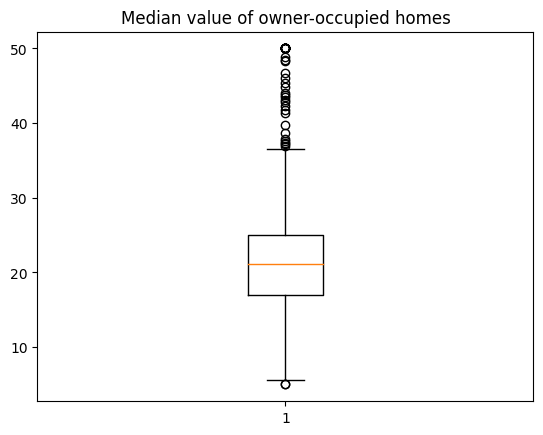

In [89]:
boston_df
pyplot.boxplot(boston_df['MEDV'])
pyplot.title("Median value of owner-occupied homes")

In [90]:
boston_df['MEDV'].median()

21.2

The median value of owner-occupied homes is 21.2

## Provide barplot of the Charles River variable

<ipython-input-58-f659559e643a>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  CHAS.set_xticklabels(labels)


[Text(0, 0, 'close'), Text(1, 0, 'not close')]

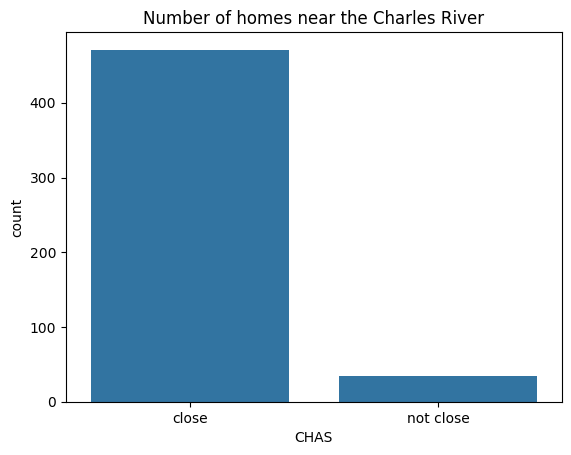

In [58]:
CHAS = sns.countplot(x = 'CHAS', data = boston_df)
labels = [item.get_text() for item in CHAS.get_xticklabels()]
labels = ['close','not close']
CHAS.set_title('Number of homes near the Charles River')
CHAS.set_xticklabels(labels)


### Question: Is there a significant difference in median value of houses bounded by the Charles river or not?

State the hypothesis

*   $H\_0:$ "there is no difference in median value of houses bounded by the Charles river"
*   $H\_1:$ "there is  difference in median value of houses bounded by the Charles river"

In [93]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS2'] = 'FAR'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS2'] = 'NEAR'
scipy.stats.ttest_ind(boston_df[boston_df['CHAS2'] == 'FAR']['MEDV'],
                   boston_df[boston_df['CHAS2'] == 'NEAR']['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

The result of the ttest is < of 0.05, therefore we reject the NULL hypothesis, concluding that there is a significant difference in median value of houses bounded by the Charles river

## Provide a boxplot for the MEDV variable vs the AGE variable.

<AxesSubplot:title={'center':'MEDV'}, xlabel='AGE_GROUP'>

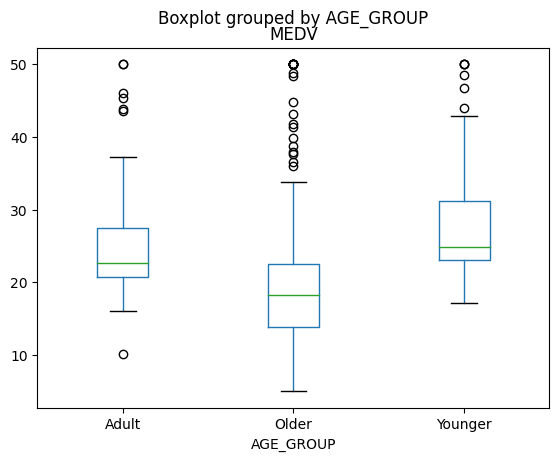

In [79]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = 'Younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'Adult'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = 'Older'
df = boston_df[['MEDV', 'AGE_GROUP']]

df.boxplot(column='MEDV', by='AGE_GROUP', grid=False)

### Question: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

State the hypothesis

*   $H\_0:$ "there is no difference in median value for each proportion of owner occupied units built prior to 1940"
*   $H\_1:$ "there is  difference in median value for each proportion of owner occupied units built prior to 1940"

In [94]:
younger = boston_df[boston_df['AGE_GROUP'] == 'Younger']['MEDV']
adult = boston_df[boston_df['AGE_GROUP'] == 'Adult']['MEDV']
older = boston_df[boston_df['AGE_GROUP'] == 'Older']['MEDV']

In [95]:
f_statistic, p_value = scipy.stats.f_oneway(younger, adult, older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


The result of the anova is < of 0.05, therefore we reject the NULL hypothesis, concluding that there is a significant difference for each proportion of owner occupied units built prior to 1940

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

Text(0, 0.5, 'Nitric oxide concentrations')

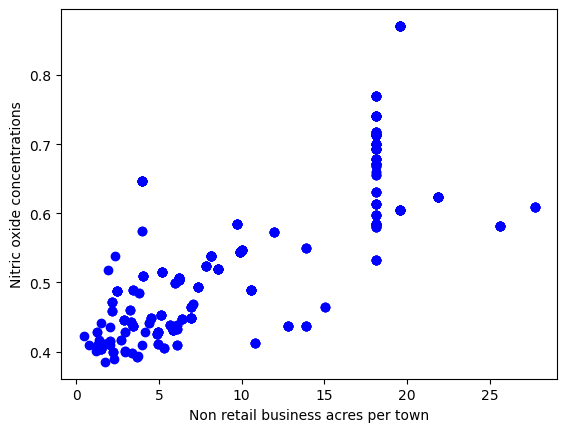

In [85]:
boston_df
pyplot.scatter(boston_df['INDUS'], boston_df['NOX'], color='blue', label='Data Points')
pyplot.xlabel('Non retail business acres per town')
pyplot.ylabel('Nitric oxide concentrations')

Comments: It looks like there is a positive linear relationship between the two variables 

### Question: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

State the hypothesis

*   $H\_0:$ "there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town"
*   $H\_1:$ "there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town"

In [97]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

The result of the correlation analysis is < of 0.05, therefore we reject the NULL hypothesis, concluding that there is a significant relationship between the two variables

## Create a histogram for the pupil to teacher ratio variable

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

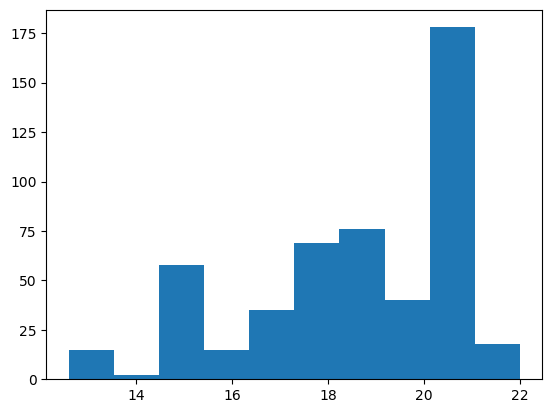

In [87]:
pyplot.hist(boston_df['PTRATIO'])

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? 

State the hypothesis
*   $H\_0$ There is no impact
*   $H\_1$ There is impact

In [99]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 09 May 2024   Prob (F-statistic):           1.21e-08
Time:                        13:40:35   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coef DIS of 1.0916 indicates that an additional weighted distance to the 5 empolyment centers in boston increases of 1.0916 the median value of owner occupied homes